In [106]:
%% capture
#INstalação da biblioteca que captura dados do ibovesp
!pip install pandas-datareader yfinance pandas numpy matplotlib

#leitura de bibliotecas de tratamentos de dados 
import pandas as pd
import pandas_datareader.data as pdr
import yfinance

#Captura dos dados de itau 
yfinance.pdr_override()
ativos = "ITUB3.SA"

#Definicao das datas de captura
data_inicial = "2023-01-01"
data_final = "2024-01-30"

#Criação da tabela
tabela_cotacoes = pdr.get_data_yahoo(ativos, data_inicial, data_final)
df = pd.DataFrame(tabela_cotacoes)
df

UsageError: Cell magic `%%` not found.


# 1) Explorando os dados

### 1.1) Visualizando a tabela de ativos

In [107]:
df

,Open,High,Low,Close,Adjusted Close,Volume,MA5,Return Percent,Daily Range,Trend Status,Cumulative Return,Log Return
Date,,,,,,,,,,,,
2023-01-02,21.629999,21.639999,21.180000,21.450001,20.326002,480200,23.616760,NaN,0.459999,Baixa,NaN,NaN
2023-01-03,21.450001,21.500000,20.870001,21.040001,19.937481,793700,23.616760,-1.911421,0.629999,Baixa,0.980886,-0.019299
2023-01-04,21.100000,21.379999,20.959999,21.059999,19.956432,802000,23.616760,0.095050,0.420000,Baixa,0.981818,0.000950
2023-01-05,21.170000,21.790001,21.080000,21.680000,20.543945,1000000,23.616760,2.943974,0.710001,Baixa,1.010723,0.029015
2023-01-06,21.730000,22.059999,21.629999,21.959999,20.809269,990400,21.438000,1.291507,0.430000,Alta,1.023776,0.012832
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-15,28.290001,28.459999,28.100000,28.459999,28.459999,108000,28.306000,0.529847,0.359999,Alta,1.326806,0.005284
2024-01-16,28.400000,28.459999,28.030001,28.070000,28.070000,342100,28.280000,-1.370342,0.429998,Baixa,1.308625,-0.013798
2024-01-17,27.990000,28.059999,27.900000,27.969999,27.969999,365100,28.214000,-0.356254,0.160000,Baixa,1.303963,-0.003569


### 1.2) Informações sobre o DataFrame

- Colunas existentes
- Tipo de dado na coluna (Texto, número, etc)
- Quantidade de dados números
- Quantidade de memoria na tabela

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 262 entries, 2023-01-02 to 2024-01-19
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Open               262 non-null    float64 
 1   High               262 non-null    float64 
 2   Low                262 non-null    float64 
 3   Close              262 non-null    float64 
 4   Adjusted Close     262 non-null    float64 
 5   Volume             262 non-null    int64   
 6   MA5                262 non-null    float64 
 7   Return Percent     261 non-null    float64 
 8   Daily Range        262 non-null    float64 
 9   Trend Status       262 non-null    category
 10  Cumulative Return  261 non-null    float64 
 11  Log Return         261 non-null    float64 
dtypes: category(1), float64(10), int64(1)
memory usage: 33.0 KB


### 1.3) Estatísticas descritivas
- Média (mean) das colunas
- std (desvio padrão) das colunas
- min (valor mínimo) das colunas
- 25% (1 quartil) das colunas
- 50% (2 quartil/Mediana) das colunas
- 75% (3 quartial) das colunas
- Máx (Valor máximo) das colunas

In [109]:
df.describe()

,Open,High,Low,Close,Adjusted Close,Volume,MA5,Return Percent,Daily Range,Cumulative Return,Log Return
count,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,261.000000,262.000000,261.000000,261.000000
mean,23.605382,23.859275,23.394656,23.631832,23.008537,586711.450382,23.616760,0.109751,0.464618,1.102107,0.001018
std,2.136777,2.131717,2.156551,2.158384,2.451614,227557.108875,2.099439,1.260379,0.167006,0.100619,0.012555
min,19.600000,19.940001,19.530001,19.820000,18.812092,108000.000000,20.072000,-3.621545,0.160000,0.924009,-0.036888
25%,21.977499,22.395000,21.745000,22.037500,21.120951,427325.000000,22.148500,-0.687147,0.340000,1.029837,-0.006895
50%,23.219999,23.480000,22.980000,23.190001,22.783731,527600.000000,23.263000,0.079898,0.430000,1.081119,0.000799
75%,24.712500,24.920000,24.520000,24.740000,24.136638,760950.000000,24.686500,0.819277,0.549999,1.153380,0.008159
max,28.840000,29.010000,28.540001,28.840000,28.822350,1000000.000000,28.640000,6.547345,1.240000,1.344522,0.063419


# 2) Manipulação de dados

### 2.1) Renomeando Colunas

- Exemplo abaixo renomeamos a coluna Adj Close para Adjusted Close
- o parâmetro inplace = True inplica em confirmar a mudança na tabela df

In [110]:
# Renomear colunas para nomes mais amigáveis
df.rename(columns={'Adj Close': 'Adjusted Close'}, inplace=True)
df.head()

,Open,High,Low,Close,Adjusted Close,Volume,MA5,Return Percent,Daily Range,Trend Status,Cumulative Return,Log Return
Date,,,,,,,,,,,,
2023-01-02,21.629999,21.639999,21.180000,21.450001,20.326002,480200,23.61676,NaN,0.459999,Baixa,NaN,NaN
2023-01-03,21.450001,21.500000,20.870001,21.040001,19.937481,793700,23.61676,-1.911421,0.629999,Baixa,0.980886,-0.019299
2023-01-04,21.100000,21.379999,20.959999,21.059999,19.956432,802000,23.61676,0.095050,0.420000,Baixa,0.981818,0.000950
2023-01-05,21.170000,21.790001,21.080000,21.680000,20.543945,1000000,23.61676,2.943974,0.710001,Baixa,1.010723,0.029015
2023-01-06,21.730000,22.059999,21.629999,21.959999,20.809269,990400,21.43800,1.291507,0.430000,Alta,1.023776,0.012832


### 2.2) Filtrando Dados por Condição

In [111]:
# Filtrar os dias em que o preço de fechamento foi superior a 22
filtro = df['Close'] > 22
df_filtrado = df[filtro]
df_filtrado.head()

,Open,High,Low,Close,Adjusted Close,Volume,MA5,Return Percent,Daily Range,Trend Status,Cumulative Return,Log Return
Date,,,,,,,,,,,,
2023-01-09,21.889999,22.170000,21.760000,22.020000,20.866127,991100,21.552,0.273230,0.410000,Alta,1.026573,0.002729
2023-01-10,21.940001,22.440001,21.700001,22.370001,21.197790,616300,21.818,1.589466,0.740000,Alta,1.042890,0.015770
2023-01-11,22.350000,23.000000,22.230000,22.930000,21.728443,831700,22.192,2.503350,0.770000,Alta,1.068998,0.024725
2023-01-12,22.830000,23.080000,22.360001,22.889999,21.690536,1000000,22.434,-0.174448,0.719999,Alta,1.067133,-0.001746
2023-01-13,22.620001,22.690001,22.400000,22.629999,21.444166,610100,22.568,-1.135868,0.290001,Alta,1.055012,-0.011424


### 2.3) Adicionando Coluna Calculada
- Exemplo calculando a media móvel de 5 dias

In [112]:
# Adicionar uma coluna de Média Móvel de 5 dias para o preço de fechamento
df['MA5'] = df['Close'].rolling(window=5).mean()
df.head()

,Open,High,Low,Close,Adjusted Close,Volume,MA5,Return Percent,Daily Range,Trend Status,Cumulative Return,Log Return
Date,,,,,,,,,,,,
2023-01-02,21.629999,21.639999,21.180000,21.450001,20.326002,480200,NaN,NaN,0.459999,Baixa,NaN,NaN
2023-01-03,21.450001,21.500000,20.870001,21.040001,19.937481,793700,NaN,-1.911421,0.629999,Baixa,0.980886,-0.019299
2023-01-04,21.100000,21.379999,20.959999,21.059999,19.956432,802000,NaN,0.095050,0.420000,Baixa,0.981818,0.000950
2023-01-05,21.170000,21.790001,21.080000,21.680000,20.543945,1000000,NaN,2.943974,0.710001,Baixa,1.010723,0.029015
2023-01-06,21.730000,22.059999,21.629999,21.959999,20.809269,990400,21.438,1.291507,0.430000,Alta,1.023776,0.012832


### 2.4) Preenchendo Valores Ausentes
- Aqui usamos a média como valor para preenchimento

In [113]:
# Preencher valores ausentes usando a média
df.fillna(df.mean(), inplace=True)
df.head()

C:\Users\Bruno\AppData\Local\Temp\ipykernel_9100\1987372158.py:2: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



,Open,High,Low,Close,Adjusted Close,Volume,MA5,Return Percent,Daily Range,Trend Status,Cumulative Return,Log Return
Date,,,,,,,,,,,,
2023-01-02,21.629999,21.639999,21.180000,21.450001,20.326002,480200,23.61676,0.109751,0.459999,Baixa,1.102107,0.001018
2023-01-03,21.450001,21.500000,20.870001,21.040001,19.937481,793700,23.61676,-1.911421,0.629999,Baixa,0.980886,-0.019299
2023-01-04,21.100000,21.379999,20.959999,21.059999,19.956432,802000,23.61676,0.095050,0.420000,Baixa,0.981818,0.000950
2023-01-05,21.170000,21.790001,21.080000,21.680000,20.543945,1000000,23.61676,2.943974,0.710001,Baixa,1.010723,0.029015
2023-01-06,21.730000,22.059999,21.629999,21.959999,20.809269,990400,21.43800,1.291507,0.430000,Alta,1.023776,0.012832


### 2.5) Removendo Dados Duplicados

In [114]:
# Remover linhas duplicadas (se existirem)
df.drop_duplicates(inplace=True)
df.head()

,Open,High,Low,Close,Adjusted Close,Volume,MA5,Return Percent,Daily Range,Trend Status,Cumulative Return,Log Return
Date,,,,,,,,,,,,
2023-01-02,21.629999,21.639999,21.180000,21.450001,20.326002,480200,23.61676,0.109751,0.459999,Baixa,1.102107,0.001018
2023-01-03,21.450001,21.500000,20.870001,21.040001,19.937481,793700,23.61676,-1.911421,0.629999,Baixa,0.980886,-0.019299
2023-01-04,21.100000,21.379999,20.959999,21.059999,19.956432,802000,23.61676,0.095050,0.420000,Baixa,0.981818,0.000950
2023-01-05,21.170000,21.790001,21.080000,21.680000,20.543945,1000000,23.61676,2.943974,0.710001,Baixa,1.010723,0.029015
2023-01-06,21.730000,22.059999,21.629999,21.959999,20.809269,990400,21.43800,1.291507,0.430000,Alta,1.023776,0.012832


### 2.6) Agregação de Dados por Mês

In [115]:
# Agregar o volume médio por mês
df_resampled = df.resample('M').mean()
df_resampled

,Open,High,Low,Close,Adjusted Close,Volume,MA5,Return Percent,Daily Range,Cumulative Return,Log Return
Date,,,,,,,,,,,
2023-01-31,21.988636,22.233182,21.714091,22.003636,20.850623,700440.909091,22.413865,0.037062,0.519091,1.030452,0.000258
2023-02-28,22.020000,22.393889,21.769444,22.072778,20.933286,539505.555556,22.032222,0.065408,0.624445,1.029034,0.000437
2023-03-31,20.695217,20.940870,20.440869,20.653478,19.670956,613621.739130,20.741130,-0.124709,0.500000,0.962866,-0.001342
2023-04-30,21.420000,21.650000,21.232222,21.462222,20.661009,586372.222222,21.347667,0.275953,0.417778,1.000570,0.002653
2023-05-31,22.494091,22.775909,22.281818,22.499546,21.676927,546250.000000,22.431636,0.067649,0.494091,1.048930,0.000573
2023-06-30,23.949048,24.215714,23.815238,24.041429,23.290430,708671.428571,23.863048,0.442605,0.400476,1.120812,0.004370
2023-07-31,24.808571,25.049524,24.589048,24.831905,24.218959,556438.095238,24.804952,0.048540,0.460476,1.157665,0.000445
2023-08-31,23.864348,24.045652,23.551739,23.776087,23.205751,664630.434783,23.878174,-0.255633,0.493913,1.108442,-0.002606
2023-09-30,23.221000,23.389000,23.024500,23.187500,22.765186,663260.000000,23.250800,-0.049018,0.364500,1.081002,-0.000539


### 2.7) Adicionando Coluna de Retorno Percentual

In [116]:
# Adicionar uma coluna de retorno percentual diário
df['Return Percent'] = df['Close'].pct_change() * 100
df.head()

,Open,High,Low,Close,Adjusted Close,Volume,MA5,Return Percent,Daily Range,Trend Status,Cumulative Return,Log Return
Date,,,,,,,,,,,,
2023-01-02,21.629999,21.639999,21.180000,21.450001,20.326002,480200,23.61676,NaN,0.459999,Baixa,1.102107,0.001018
2023-01-03,21.450001,21.500000,20.870001,21.040001,19.937481,793700,23.61676,-1.911421,0.629999,Baixa,0.980886,-0.019299
2023-01-04,21.100000,21.379999,20.959999,21.059999,19.956432,802000,23.61676,0.095050,0.420000,Baixa,0.981818,0.000950
2023-01-05,21.170000,21.790001,21.080000,21.680000,20.543945,1000000,23.61676,2.943974,0.710001,Baixa,1.010723,0.029015
2023-01-06,21.730000,22.059999,21.629999,21.959999,20.809269,990400,21.43800,1.291507,0.430000,Alta,1.023776,0.012832


### 2.8) Ordenando Dados por Data:

In [117]:
# Ordenar o DataFrame por data
df.sort_index(inplace=True)
df.head()

,Open,High,Low,Close,Adjusted Close,Volume,MA5,Return Percent,Daily Range,Trend Status,Cumulative Return,Log Return
Date,,,,,,,,,,,,
2023-01-02,21.629999,21.639999,21.180000,21.450001,20.326002,480200,23.61676,NaN,0.459999,Baixa,1.102107,0.001018
2023-01-03,21.450001,21.500000,20.870001,21.040001,19.937481,793700,23.61676,-1.911421,0.629999,Baixa,0.980886,-0.019299
2023-01-04,21.100000,21.379999,20.959999,21.059999,19.956432,802000,23.61676,0.095050,0.420000,Baixa,0.981818,0.000950
2023-01-05,21.170000,21.790001,21.080000,21.680000,20.543945,1000000,23.61676,2.943974,0.710001,Baixa,1.010723,0.029015
2023-01-06,21.730000,22.059999,21.629999,21.959999,20.809269,990400,21.43800,1.291507,0.430000,Alta,1.023776,0.012832


### 2.9) Agrupando Dados por Ano e Calculando Estatísticas:

In [118]:
# Agrupar por ano e calcular estatísticas
df_grouped = df.groupby(df.index.year).agg({'Close': 'mean', 'Volume': 'sum'})
df_grouped

,Close,Volume
Date,,
2023,23.372984,148762300
2024,28.217143,4956100


###  2.10) Removendo uma Coluna

In [119]:
# Remover a coluna 'Low'
df.drop('Low', axis=1)
df.head()

,Open,High,Low,Close,Adjusted Close,Volume,MA5,Return Percent,Daily Range,Trend Status,Cumulative Return,Log Return
Date,,,,,,,,,,,,
2023-01-02,21.629999,21.639999,21.180000,21.450001,20.326002,480200,23.61676,NaN,0.459999,Baixa,1.102107,0.001018
2023-01-03,21.450001,21.500000,20.870001,21.040001,19.937481,793700,23.61676,-1.911421,0.629999,Baixa,0.980886,-0.019299
2023-01-04,21.100000,21.379999,20.959999,21.059999,19.956432,802000,23.61676,0.095050,0.420000,Baixa,0.981818,0.000950
2023-01-05,21.170000,21.790001,21.080000,21.680000,20.543945,1000000,23.61676,2.943974,0.710001,Baixa,1.010723,0.029015
2023-01-06,21.730000,22.059999,21.629999,21.959999,20.809269,990400,21.43800,1.291507,0.430000,Alta,1.023776,0.012832


### 2.11) Adicionando uma Coluna de Variação Diária

In [120]:
# Adicionar uma coluna de variação diária (diferença entre preço alto e baixo)
df['Daily Range'] = df['High'] - df['Low']
df.head()

,Open,High,Low,Close,Adjusted Close,Volume,MA5,Return Percent,Daily Range,Trend Status,Cumulative Return,Log Return
Date,,,,,,,,,,,,
2023-01-02,21.629999,21.639999,21.180000,21.450001,20.326002,480200,23.61676,NaN,0.459999,Baixa,1.102107,0.001018
2023-01-03,21.450001,21.500000,20.870001,21.040001,19.937481,793700,23.61676,-1.911421,0.629999,Baixa,0.980886,-0.019299
2023-01-04,21.100000,21.379999,20.959999,21.059999,19.956432,802000,23.61676,0.095050,0.420000,Baixa,0.981818,0.000950
2023-01-05,21.170000,21.790001,21.080000,21.680000,20.543945,1000000,23.61676,2.943974,0.710001,Baixa,1.010723,0.029015
2023-01-06,21.730000,22.059999,21.629999,21.959999,20.809269,990400,21.43800,1.291507,0.430000,Alta,1.023776,0.012832


### 2.12) Substituindo Valores com Base em Condição:
- No exemplo abaixo caso o volume no dia for maior que 1000000 substituimos pelo proprio valor 1000000

In [121]:
# Substituir valores na coluna 'Volume' com base em uma condição
df.loc[df['Volume'] > 1000000, 'Volume'] = 1000000
df.head()

,Open,High,Low,Close,Adjusted Close,Volume,MA5,Return Percent,Daily Range,Trend Status,Cumulative Return,Log Return
Date,,,,,,,,,,,,
2023-01-02,21.629999,21.639999,21.180000,21.450001,20.326002,480200,23.61676,NaN,0.459999,Baixa,1.102107,0.001018
2023-01-03,21.450001,21.500000,20.870001,21.040001,19.937481,793700,23.61676,-1.911421,0.629999,Baixa,0.980886,-0.019299
2023-01-04,21.100000,21.379999,20.959999,21.059999,19.956432,802000,23.61676,0.095050,0.420000,Baixa,0.981818,0.000950
2023-01-05,21.170000,21.790001,21.080000,21.680000,20.543945,1000000,23.61676,2.943974,0.710001,Baixa,1.010723,0.029015
2023-01-06,21.730000,22.059999,21.629999,21.959999,20.809269,990400,21.43800,1.291507,0.430000,Alta,1.023776,0.012832


### 2.13) Criando uma Coluna de Status de Tendência (Alta/Baixa)

- Caso o valor de fechamento esteja maior que a media movel dos ultimo 5 dias é categorizado como alto (Lembrado aqui é possivel costumizar essa regra de acordo com a análise que esta sendo criada)

In [122]:
#Lendo biblioteca de manipulacao de dados
import numpy as np

#Criando a coluna de tendencia
df['Trend Status'] = pd.Categorical(np.where(df['Close'] > df['MA5'], 'Alta', 'Baixa'))
df.head()

,Open,High,Low,Close,Adjusted Close,Volume,MA5,Return Percent,Daily Range,Trend Status,Cumulative Return,Log Return
Date,,,,,,,,,,,,
2023-01-02,21.629999,21.639999,21.180000,21.450001,20.326002,480200,23.61676,NaN,0.459999,Baixa,1.102107,0.001018
2023-01-03,21.450001,21.500000,20.870001,21.040001,19.937481,793700,23.61676,-1.911421,0.629999,Baixa,0.980886,-0.019299
2023-01-04,21.100000,21.379999,20.959999,21.059999,19.956432,802000,23.61676,0.095050,0.420000,Baixa,0.981818,0.000950
2023-01-05,21.170000,21.790001,21.080000,21.680000,20.543945,1000000,23.61676,2.943974,0.710001,Baixa,1.010723,0.029015
2023-01-06,21.730000,22.059999,21.629999,21.959999,20.809269,990400,21.43800,1.291507,0.430000,Alta,1.023776,0.012832


### 2.14) Filtrar dados para o período de 2023-02-01 a 2023-04-01

In [123]:
#Escolha do intervalo de datas para filtragem
df_period = df['2023-02-01':'2023-04-01']
df_period.head()

,Open,High,Low,Close,Adjusted Close,Volume,MA5,Return Percent,Daily Range,Trend Status,Cumulative Return,Log Return
Date,,,,,,,,,,,,
2023-02-01,21.400000,21.65,21.170000,21.360001,20.257303,439200,21.464,-0.881664,0.480000,Baixa,0.995804,-0.008856
2023-02-02,21.290001,22.00,21.139999,21.410000,20.304722,526500,21.380,0.234079,0.860001,Alta,0.998135,0.002338
2023-02-03,21.490000,21.51,21.070000,21.360001,20.257303,1000000,21.396,-0.233532,0.440001,Baixa,0.995804,-0.002338
2023-02-06,21.360001,21.60,21.080000,21.540001,20.428017,841300,21.444,0.842698,0.520000,Alta,1.004196,0.008392
2023-02-07,21.500000,21.67,20.940001,21.230000,20.134014,447500,21.380,-1.439189,0.730000,Baixa,0.989744,-0.014496


### 2.15) Calculando Retorno Acumulado

In [124]:
# Calcular retorno acumulado a partir do primeiro dia
df['Cumulative Return'] = (1 + df['Return Percent'] / 100).cumprod()
df.head()

,Open,High,Low,Close,Adjusted Close,Volume,MA5,Return Percent,Daily Range,Trend Status,Cumulative Return,Log Return
Date,,,,,,,,,,,,
2023-01-02,21.629999,21.639999,21.180000,21.450001,20.326002,480200,23.61676,NaN,0.459999,Baixa,NaN,0.001018
2023-01-03,21.450001,21.500000,20.870001,21.040001,19.937481,793700,23.61676,-1.911421,0.629999,Baixa,0.980886,-0.019299
2023-01-04,21.100000,21.379999,20.959999,21.059999,19.956432,802000,23.61676,0.095050,0.420000,Baixa,0.981818,0.000950
2023-01-05,21.170000,21.790001,21.080000,21.680000,20.543945,1000000,23.61676,2.943974,0.710001,Baixa,1.010723,0.029015
2023-01-06,21.730000,22.059999,21.629999,21.959999,20.809269,990400,21.43800,1.291507,0.430000,Alta,1.023776,0.012832


### 2.16) Criando Coluna de Retorno Logarítmico

In [125]:
# Adicionar uma coluna de retorno logarítmico diário
df['Log Return'] = np.log(df['Close'] / df['Close'].shift(1))
df.head()

,Open,High,Low,Close,Adjusted Close,Volume,MA5,Return Percent,Daily Range,Trend Status,Cumulative Return,Log Return
Date,,,,,,,,,,,,
2023-01-02,21.629999,21.639999,21.180000,21.450001,20.326002,480200,23.61676,NaN,0.459999,Baixa,NaN,NaN
2023-01-03,21.450001,21.500000,20.870001,21.040001,19.937481,793700,23.61676,-1.911421,0.629999,Baixa,0.980886,-0.019299
2023-01-04,21.100000,21.379999,20.959999,21.059999,19.956432,802000,23.61676,0.095050,0.420000,Baixa,0.981818,0.000950
2023-01-05,21.170000,21.790001,21.080000,21.680000,20.543945,1000000,23.61676,2.943974,0.710001,Baixa,1.010723,0.029015
2023-01-06,21.730000,22.059999,21.629999,21.959999,20.809269,990400,21.43800,1.291507,0.430000,Alta,1.023776,0.012832


### 2.17) Operações matematicas básicas

In [126]:
print('media:',df['Open'].mean())
print('mediana:', df['Open'].median())
print('maxima abertura no perido:', df['Open'].max())
print('Máximo volumeno tempo:', df['Volume'].max())

media: 23.605381710838724
mediana: 23.219999313354492
maxima abertura no perido: 28.84000015258789
Máximo volumeno tempo: 1000000


### 2.18) Mostrar as top N primeiras linhas

In [127]:
#5linhas
df.head(5)

,Open,High,Low,Close,Adjusted Close,Volume,MA5,Return Percent,Daily Range,Trend Status,Cumulative Return,Log Return
Date,,,,,,,,,,,,
2023-01-02,21.629999,21.639999,21.180000,21.450001,20.326002,480200,23.61676,NaN,0.459999,Baixa,NaN,NaN
2023-01-03,21.450001,21.500000,20.870001,21.040001,19.937481,793700,23.61676,-1.911421,0.629999,Baixa,0.980886,-0.019299
2023-01-04,21.100000,21.379999,20.959999,21.059999,19.956432,802000,23.61676,0.095050,0.420000,Baixa,0.981818,0.000950
2023-01-05,21.170000,21.790001,21.080000,21.680000,20.543945,1000000,23.61676,2.943974,0.710001,Baixa,1.010723,0.029015
2023-01-06,21.730000,22.059999,21.629999,21.959999,20.809269,990400,21.43800,1.291507,0.430000,Alta,1.023776,0.012832


### 2.19) Mostrar as top N últimas linhas

In [128]:
#5linhas
df.tail(5)

,Open,High,Low,Close,Adjusted Close,Volume,MA5,Return Percent,Daily Range,Trend Status,Cumulative Return,Log Return
Date,,,,,,,,,,,,
2024-01-15,28.290001,28.459999,28.100000,28.459999,28.459999,108000,28.306000,0.529847,0.359999,Alta,1.326806,0.005284
2024-01-16,28.400000,28.459999,28.030001,28.070000,28.070000,342100,28.280000,-1.370342,0.429998,Baixa,1.308625,-0.013798
2024-01-17,27.990000,28.059999,27.900000,27.969999,27.969999,365100,28.214000,-0.356254,0.160000,Baixa,1.303963,-0.003569
2024-01-18,27.990000,28.110001,27.719999,27.809999,27.809999,219400,28.123999,-0.572041,0.390001,Baixa,1.296503,-0.005737
2024-01-19,27.820000,28.000000,27.730000,27.980000,27.980000,536300,28.057999,0.611291,0.270000,Baixa,1.304429,0.006094


### 2.20) Operações matematicas entre colunas

In [129]:
#Criar coluna
df['multiplicacao'] = df['Volume'] * df['Volume']
df['soma'] = df['Volume'] + df['Volume']
df['subtracao'] = df['Volume'] /df['Volume']

#exibir resultados
df.head()

,Open,High,Low,Close,Adjusted Close,Volume,MA5,Return Percent,Daily Range,Trend Status,Cumulative Return,Log Return,multiplicacao,soma,subtracao
Date,,,,,,,,,,,,,,,
2023-01-02,21.629999,21.639999,21.180000,21.450001,20.326002,480200,23.61676,NaN,0.459999,Baixa,NaN,NaN,230592040000,960400,1.0
2023-01-03,21.450001,21.500000,20.870001,21.040001,19.937481,793700,23.61676,-1.911421,0.629999,Baixa,0.980886,-0.019299,629959690000,1587400,1.0
2023-01-04,21.100000,21.379999,20.959999,21.059999,19.956432,802000,23.61676,0.095050,0.420000,Baixa,0.981818,0.000950,643204000000,1604000,1.0
2023-01-05,21.170000,21.790001,21.080000,21.680000,20.543945,1000000,23.61676,2.943974,0.710001,Baixa,1.010723,0.029015,1000000000000,2000000,1.0
2023-01-06,21.730000,22.059999,21.629999,21.959999,20.809269,990400,21.43800,1.291507,0.430000,Alta,1.023776,0.012832,980892160000,1980800,1.0


### 2.21) Apagar colunas

In [130]:
#uma coluna
df.drop(columns=['multiplicacao','soma','subtracao'], inplace =True)
df.head()

,Open,High,Low,Close,Adjusted Close,Volume,MA5,Return Percent,Daily Range,Trend Status,Cumulative Return,Log Return
Date,,,,,,,,,,,,
2023-01-02,21.629999,21.639999,21.180000,21.450001,20.326002,480200,23.61676,NaN,0.459999,Baixa,NaN,NaN
2023-01-03,21.450001,21.500000,20.870001,21.040001,19.937481,793700,23.61676,-1.911421,0.629999,Baixa,0.980886,-0.019299
2023-01-04,21.100000,21.379999,20.959999,21.059999,19.956432,802000,23.61676,0.095050,0.420000,Baixa,0.981818,0.000950
2023-01-05,21.170000,21.790001,21.080000,21.680000,20.543945,1000000,23.61676,2.943974,0.710001,Baixa,1.010723,0.029015
2023-01-06,21.730000,22.059999,21.629999,21.959999,20.809269,990400,21.43800,1.291507,0.430000,Alta,1.023776,0.012832


# 3) Criação de gráficos

### 3.1) Gráfico de série temporal do preço de fechamento

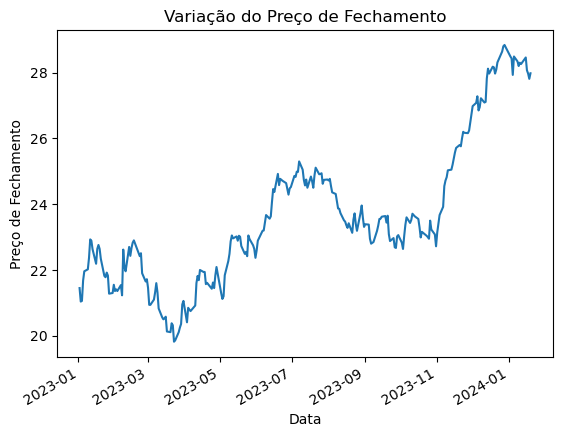

In [131]:
import matplotlib.pyplot as plt

#Seleciona a coluna do gráfico "close" e o titulo do gráfico
df['Close'].plot(title='Variação do Preço de Fechamento')

#Adiciona titulo ao eixo X
plt.xlabel('Data')

#Adiciona título ao eixo Y
plt.ylabel('Preço de Fechamento')

#Exibe o gráfico
plt.show()

### 3.2) Distribuição/concentração do preço de fechamento no último ano

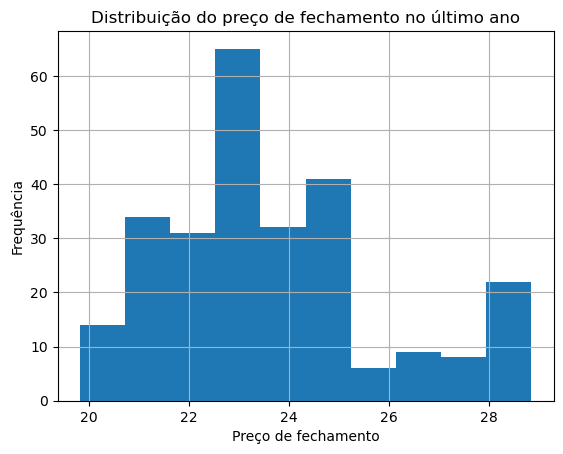

In [132]:
#Criação do histograma
df['Close'].hist()

#Adiciona um título
plt.title('Distribuição do preço de fechamento no último ano')

#Dar nome ao eixo X
plt.xlabel('Preço de fechamento')

#Dar nome ao eixo Y
plt.ylabel('Frequência')

#plota o gráfico
plt.show()

### 3.3) Gráfico de dispersão entre o preço de abertura e o preço de fechamento

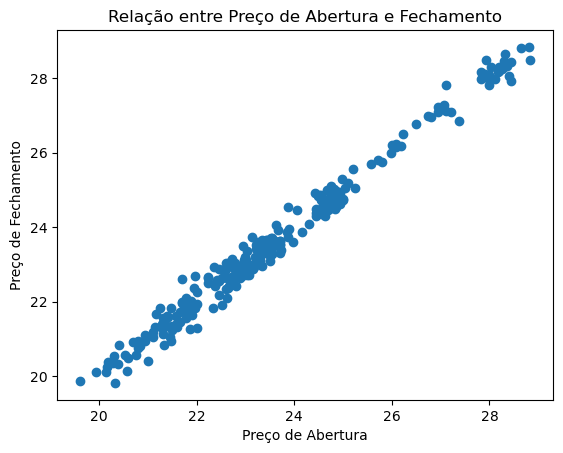

In [133]:
#Cria o gráfico de dispersao
plt.scatter(df['Open'], df['Close'])

#Cria título ao gráfico
plt.title('Relação entre Preço de Abertura e Fechamento')

#Adiciona título ao eixo X
plt.xlabel('Preço de Abertura')

#Adiciona título ao eixo Y
plt.ylabel('Preço de Fechamento')

#Plota gráfico
plt.show()

### 3.4) Gráfico de candle por dia

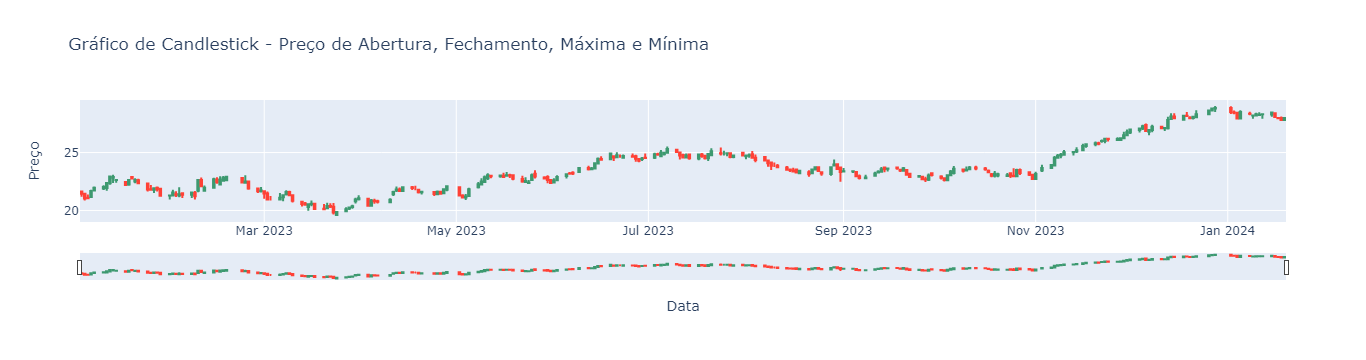

In [134]:
#Importa biblioteca de criação de dados interativos plotly
import plotly.graph_objects as go

#Adiciona ao eixo X as datas (index)
fig = go.Figure(data=[go.Candlestick(x=df.index,
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])

#Adiciona titutlo ao gráfico, eixo x e y
fig.update_layout(title='Gráfico de Candlestick - Preço de Abertura, Fechamento, Máxima e Mínima',
                  xaxis_title='Data',
                  yaxis_title='Preço')
#plota
fig.show()

# 4) Salvando e lendo uma tabela externa
- excel
- csv
- txt

### 4.1) Salvando resultados

In [135]:
#Excel
df.to_excel("tabela_excel.xlsx")

#Csv separado por :
df.to_csv("tabela_csv.csv",sep=";")

#txt separado por ;
df.to_csv("tabela_txt.txt",sep=";")

### 4.2) Lendo resultados

In [136]:
#Excel
print("lendo e exibindo excel")
df_excel = pd.read_excel("tabela_excel.xlsx")
print(df_excel.head(1))

#Csv separado por :
print("lendo e exibindo csv")
df_csv = pd.read_csv("tabela_csv.csv",sep=";")
print(df_csv.head(1))

#txt separado por ;
print("lendo e exibindo txt")
df_txt = pd.read_csv("tabela_txt.txt",sep=";")
print(df_txt.head(1))

lendo e exibindo excel
        Date       Open       High    Low      Close  Adjusted Close  Volume  \
0 2023-01-02  21.629999  21.639999  21.18  21.450001       20.326002  480200   

        MA5  Return Percent  Daily Range Trend Status  Cumulative Return  \
0  23.61676             NaN     0.459999        Baixa                NaN   

   Log Return  
0         NaN  
lendo e exibindo csv
         Date       Open       High    Low      Close  Adjusted Close  Volume  \
0  2023-01-02  21.629999  21.639999  21.18  21.450001       20.326002  480200   

        MA5  Return Percent  Daily Range Trend Status  Cumulative Return  \
0  23.61676             NaN     0.459999        Baixa                NaN   

   Log Return  
0         NaN  
lendo e exibindo txt
         Date       Open       High    Low      Close  Adjusted Close  Volume  \
0  2023-01-02  21.629999  21.639999  21.18  21.450001       20.326002  480200   

        MA5  Return Percent  Daily Range Trend Status  Cumulative Return  \
0 